In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Prasad Mahajan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
np.random.seed(0)
n=100
time = pd.date_range(start = "2020-01-01",periods=n,freq="D")
time

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [4]:
trend = 0.1*np.arange(n)
trend

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [5]:
seasonality = 10*np.sin(np.linspace(0,4*np.pi,n))
seasonality

array([ 0.00000000e+00,  1.26592454e+00,  2.51147987e+00,  3.71662456e+00,
        4.86196736e+00,  5.92907929e+00,  6.90079011e+00,  7.76146464e+00,
        8.49725430e+00,  9.09631995e+00,  9.54902241e+00,  9.84807753e+00,
        9.98867339e+00,  9.96854776e+00,  9.78802446e+00,  9.45000819e+00,
        8.95993774e+00,  8.32569855e+00,  7.55749574e+00,  6.66769001e+00,
        5.67059864e+00,  4.58226522e+00,  3.42020143e+00,  2.20310533e+00,
        9.50560433e-01, -3.17279335e-01, -1.58001396e+00, -2.81732557e+00,
       -4.00930535e+00, -5.13677392e+00, -6.18158986e+00, -7.12694171e+00,
       -7.95761841e+00, -8.66025404e+00, -9.22354294e+00, -9.63842159e+00,
       -9.89821442e+00, -9.99874128e+00, -9.93838464e+00, -9.71811568e+00,
       -9.34147860e+00, -8.81453363e+00, -8.14575952e+00, -7.34591709e+00,
       -6.42787610e+00, -5.40640817e+00, -4.29794912e+00, -3.12033446e+00,
       -1.89251244e+00, -6.34239197e-01,  6.34239197e-01,  1.89251244e+00,
        3.12033446e+00,  

In [6]:
noise = np.random.normal(loc=0, scale=1,size=n)
noise

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

In [7]:
data = trend+seasonality+noise
data

array([ 1.76405235,  1.76608174,  3.69021786,  6.25751776,  7.12952535,
        5.45180141,  8.45087853,  8.31010743,  9.19403545, 10.40691846,
       10.69306599, 12.40235104, 11.94971112, 11.39022278, 11.63188769,
       11.28368251, 12.05401682,  9.82054028,  9.67056345,  7.71359427,
        5.11760882,  7.33588381,  6.48463763,  3.76094031,  5.62031506,
        0.72835499,  1.06574456, -0.30450942,  0.32347386, -0.76741515,
       -3.02664244, -3.64877919, -5.64540415, -7.34105051, -6.17145509,
       -5.98207262, -5.06792374, -5.09636143, -6.52571146, -6.12041843,
       -6.39003157, -6.13455157, -5.65202971, -1.09514169, -2.53752828,
       -1.34448248, -0.95074448,  2.3571559 ,  1.29358971,  4.05302052,
        4.73877264,  7.37941494,  7.80952932,  8.41731694, 10.77822595,
       12.35620797, 13.01243431, 14.14823142, 13.98021154, 14.87873744,
       15.04565524, 15.67883148, 15.38559499, 14.47193182, 16.21584773,
       15.321762  , 13.63005569, 15.12040066, 13.01964335, 13.13

In [8]:
df = pd.DataFrame({"Time":time,"Data":data})
df.head()

,Time,Data
0,2020-01-01,1.764052
1,2020-01-02,1.766082
2,2020-01-03,3.690218
3,2020-01-04,6.257518
4,2020-01-05,7.129525


In [9]:
df.set_index("Time",inplace=True)
df.head()

,Data
Time,
2020-01-01,1.764052
2020-01-02,1.766082
2020-01-03,3.690218
2020-01-04,6.257518
2020-01-05,7.129525


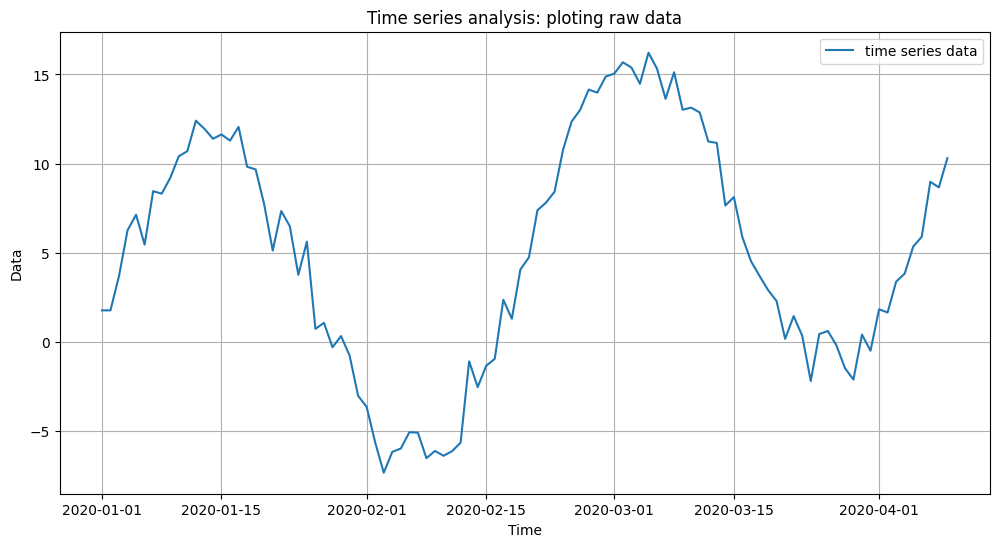

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Data'],label ="time series data")
plt.xlabel("Time")
plt.ylabel("Data")
plt.title("Time series analysis: ploting raw data")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
model = ARIMA(df['Data'],order=(2,1,2)
result =model.fit()
result.summary()


SyntaxError: '(' was never closed (2128668669.py, line 1)

In [23]:
forecast_step =30
forcasts = result.forecast(steps = forecast_step)
forcasts

2020-04-10    11.559818
2020-04-11    12.724495
2020-04-12    13.798158
2020-04-13    14.786519
2020-04-14    15.695941
2020-04-15    16.532605
2020-04-16    17.302296
2020-04-17    18.010365
2020-04-18    18.661742
2020-04-19    19.260965
2020-04-20    19.812209
2020-04-21    20.319317
2020-04-22    20.785822
2020-04-23    21.214974
2020-04-24    21.609765
2020-04-25    21.972946
2020-04-26    22.307048
2020-04-27    22.614399
2020-04-28    22.897141
2020-04-29    23.157245
2020-04-30    23.396522
2020-05-01    23.616642
2020-05-02    23.819136
2020-05-03    24.005418
2020-05-04    24.176784
2020-05-05    24.334429
2020-05-06    24.479452
2020-05-07    24.612863
2020-05-08    24.735592
2020-05-09    24.848495
Freq: D, Name: predicted_mean, dtype: float64

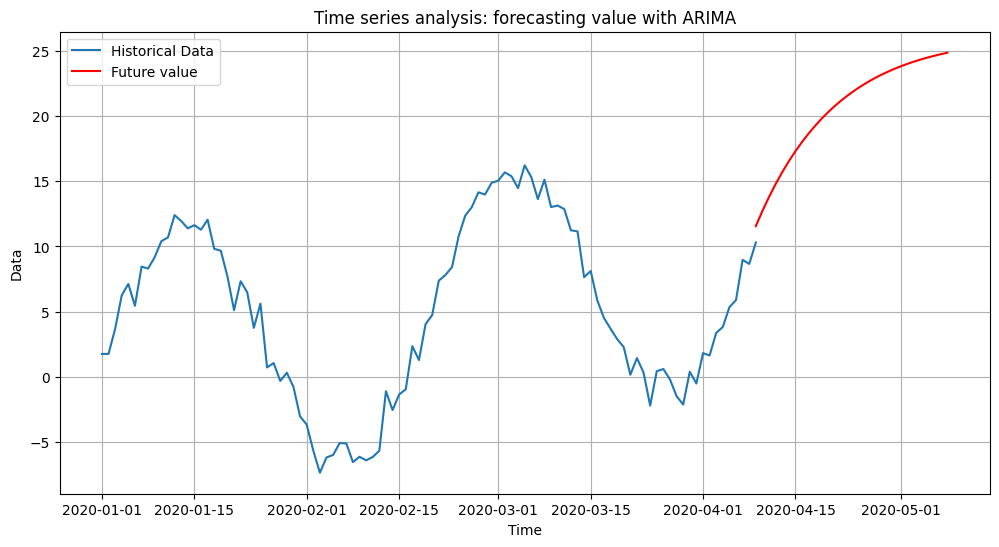

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Data'],label ="Historical Data")
plt.plot(pd.date_range(start = df.index[-1],periods=forecast_step,freq="D"),forcasts,label="Future value",color="red")
plt.xlabel("Time")
plt.ylabel("Data")
plt.title("Time series analysis: forecasting value with ARIMA")
plt.legend()
plt.grid(True)
plt.show()